In [1022]:
import numpy as np
from scipy import linalg as sLA
from numpy import linalg as LA
import copy
from matplotlib import pyplot as plt
from matplotlib import style

In [1023]:
style.use('ggplot')

# Лабораторная работа No2. Протоколы квантовых измерений и реконструкция матрицы плотности методом псевдо-инверсии

## Пункт 1:
#### Рассмотрим протокол томогрфии квантового состояния, основанный на измерениях во взаимно-несмещённых базисах (MUB) для размености d = 4:

In [1024]:
# Массив унитарных матриц образующих MUB для d = 4

mub_array = 1/2*np.array([
    [[2,0,0,0],
     [0,2,0,0],
     [0,0,2,0],
     [0,0,0,2]],
    
    [[1,1,1,1],
     [1,1,-1,-1],
     [1,-1,-1,1],
     [1,-1,1,-1]],
    
    [[1,1,1,1],
     [-1,-1,1,1],
     [-1j,1j,1j,-1j],
     [-1j,1j,-1j,1j]],
    
    [[1,1,1,1],
     [-1j,-1j,1j,1j],
     [-1j,1j,1j,-1j],
     [-1,1,-1,1]],
    
    [[1,1,1,1],
     [-1j,-1j,1j,1j],
     [-1,1,-1,1],
     [-1j,1j,1j,-1j]],
      
])

In [1025]:
# Получаем операторы P(j,k) и B из набора матриц, соответствующих заданному MUB 
def build_P(mub_array):
    P = []
    B = []
    for mub in mub_array:
        P_part = []
        B_part = []
        for string in mub.T:
            op = np.outer(string, string.conj())
            P_part.append(op)
            B_part.append(np.ravel(op, order = 'C'))
        B.append(B_part)
        P.append(P_part)
    return np.array(P), np.vstack(np.array(B))

# Получаем операторы X из набора матриц, соответствующих заданному MUB 
def build_X(mub_array):
    X = np.vstack(copy.deepcopy(mub_array).transpose((0,2,1)).conj())
    return X
    

In [1026]:
# Составим матрицы согласно заданию
P, B = build_P(mub_array)
X = build_X(mub_array)
X,P,B

(array([[ 1. -0.j ,  0. -0.j ,  0. -0.j ,  0. -0.j ],
        [ 0. -0.j ,  1. -0.j ,  0. -0.j ,  0. -0.j ],
        [ 0. -0.j ,  0. -0.j ,  1. -0.j ,  0. -0.j ],
        [ 0. -0.j ,  0. -0.j ,  0. -0.j ,  1. -0.j ],
        [ 0.5-0.j ,  0.5-0.j ,  0.5-0.j ,  0.5-0.j ],
        [ 0.5-0.j ,  0.5-0.j , -0.5-0.j , -0.5-0.j ],
        [ 0.5-0.j , -0.5-0.j , -0.5-0.j ,  0.5-0.j ],
        [ 0.5-0.j , -0.5-0.j ,  0.5-0.j , -0.5-0.j ],
        [ 0.5-0.j , -0.5-0.j ,  0. +0.5j,  0. +0.5j],
        [ 0.5-0.j , -0.5-0.j ,  0. -0.5j,  0. -0.5j],
        [ 0.5-0.j ,  0.5-0.j ,  0. -0.5j,  0. +0.5j],
        [ 0.5-0.j ,  0.5-0.j ,  0. +0.5j,  0. -0.5j],
        [ 0.5-0.j ,  0. +0.5j,  0. +0.5j, -0.5-0.j ],
        [ 0.5-0.j ,  0. +0.5j,  0. -0.5j,  0.5-0.j ],
        [ 0.5-0.j ,  0. -0.5j,  0. -0.5j, -0.5-0.j ],
        [ 0.5-0.j ,  0. -0.5j,  0. +0.5j,  0.5-0.j ],
        [ 0.5-0.j ,  0. +0.5j, -0.5-0.j ,  0. +0.5j],
        [ 0.5-0.j ,  0. +0.5j,  0.5-0.j ,  0. -0.5j],
        [ 0.5-0.j ,  0. -0.5

## Пункт 2:
#### Сгенерируем случайное чистое состояние размерности d = 4, проверим правильность полученных матриц:

In [1027]:
# Класс квантового состояния
class State():
    
    def __init__(self, d = 4):
        self.d = d
        self.phi = None
        self.rho = None
        
    def build_clear_state(self, random_state = 42):
        phi = np.random.randn(int(d)) + 1j*np.random.randn(int(d))
        self.phi = phi/np.sqrt(np.dot(phi, phi.conj()))
        self.rho = np.outer(self.phi, self.phi.conj())
        
    def set_phi(self, coefs):
        self.phi = coefs
        self.rho = np.outer(self.phi, self.phi.conj())
        
    def get_phi(self):
        return self.phi
    
    def get_rho(self):
        return self.rho
        
#Вычисление Фиделити для матриц плотности
def Fidelity(rho1, rho2):
    return np.abs(np.trace(sLA.sqrtm(sLA.sqrtm(rho1) @ rho2 @ sLA.sqrtm(rho1))))**2       

#Вычисление Фиделити для векторов чистых состояний
def Fidelity_pure(vec0, vec1):
    return np.abs(np.dot(vec0, vec1.conjugate())) ** 2

In [1028]:
# Создадим случайное чистое состояние размерности 4
d = 4

state = State(d)
state.build_clear_state()
phi = state.get_phi()
rho = state.get_rho()

#Проверка
(np.abs(phi)**2).sum(),phi, np.trace(rho), np.trace(np.dot(rho, rho))

(1.0,
 array([-0.08364259-0.08048041j,  0.59814688+0.17040049j,
         0.48166756+0.21308884j, -0.56386998-0.06596181j]),
 (1+0j),
 (1+1.3438895159624463e-18j))

In [1029]:
# Получение вероятностей по правилу Борна
def apply_P(rho,P):
    p = np.zeros((P.shape[0], P.shape[1]))
    j = 0
    for P_j in P:
        k = 0
        for P_jk in P_j:
            p[j][k] = np.trace(np.dot(P_jk, rho))
            k += 1
        j += 1
        
    return p

# Сравним распределения вероятностей
def compare_distr(m1,m2):
    return np.sum(np.abs(m1 - m2))
    

In [1030]:
# Получим вероятности измерений тремя способами
p = apply_P(rho,P)
p_X = np.abs(np.dot(X,phi))**2
p_B = np.dot(B, np.ravel(rho, order = 'F'))

/home/stas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [1031]:
# Сравним распределения вероятностей, полученные разными способами
print('Сумма модулей разностей вероятностей полученных по правилу Борна и с помощбю матрицы X: ', compare_distr(p_X.reshape((5,d)), p))
print('Сумма модулей разностей вероятностей полученных по правилу Борна и с помощбю матрицы B: ', compare_distr(p_B.reshape((5,d)), p))

Сумма модулей разностей вероятностей полученных по правилу Борна и с помощбю матрицы X:  1.1188966420050406e-15
Сумма модулей разностей вероятностей полученных по правилу Борна и с помощбю матрицы B:  3.7927769382649766e-16


/home/stas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/stas/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


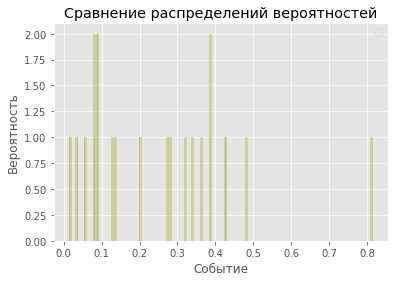

In [1032]:
plt.hist(p, bins = 100, alpha = 0.3)
plt.hist(p_X, bins = 100, alpha = 0.3)
plt.hist(p_B, bins = 100, alpha = 0.3)

plt.title(r'Сравнение распределений вероятностей')
plt.xlabel(r'Событие')
plt.ylabel(r'Вероятность')
plt.legend()
plt.show()

распределения совпадают => все способы реализованы верно

## Пункт 3:

#### Сгенерируем состояние вида $(1 - \gamma) | \phi \rangle \langle \phi | + \gamma I/d$ для $ \gamma = 0.1$



In [1033]:
# Генерирует единичную матрицу
def get_Identity(d):
    I = np.zeros((d,d))
    for i in range(d):
        I[i][i] = 1
        
    return I

In [1034]:
# Генерирует случайную матрицу плотности, близкую к чистому состоянию
def build_near_clear_rho(d = 4, gamma = 0.1):
    state = State(d)
    state.build_clear_state(random_state = 42)
    rho0 = state.get_rho()

    I = get_Identity(d)

    rho = (1 - gamma)*rho0.copy() + gamma*I/d
    
    return rho

In [1035]:
d = 4
gamma = 0

rho = build_near_clear_rho(d = d, gamma = gamma)
rho

array([[ 0.32573881+0.j        ,  0.03065281-0.35097824j,
        -0.14531915-0.14816723j, -0.20175264+0.10831622j],
       [ 0.03065281+0.35097824j,  0.38105783+0.j        ,
         0.14597288-0.17052191j, -0.13569437-0.20719235j],
       [-0.14531915+0.14816723j,  0.14597288+0.17052191j,
         0.13222614+0.j        ,  0.04073696-0.14009246j],
       [-0.20175264-0.10831622j, -0.13569437+0.20719235j,
         0.04073696+0.14009246j,  0.16097723+0.j        ]])

## Пункт 4, Пункт 5:

#### Проведём серию измерений согласно протоколу взаимо несмещённых базисов по n = 10 измерений на каждый базис. В результате получим оценку распределения вероятностей

In [1036]:
# Моделирует серию измерений:

def estimate_probs(rho, n_shots = 10, d = 4):
    p_B = np.dot(B, np.ravel(rho, order = 'F'))
    rng = np.random.default_rng()
    p_B_matrix = p_B.reshape((5,d))
    prob_res = np.ravel(np.array([rng.multinomial(n_shots, x.astype(dtype = np.float64)) for x in p_B_matrix])/n_shots, order = 'C')
    return prob_res

In [1037]:
n = 10

prob_res = estimate_probs(rho, n_shots = n, d = 4)
prob_res

/home/stas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


array([0.3, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0. , 0.3, 0.3, 0. ,
       0. , 0.8, 0.2, 0.2, 0.2, 0.4, 0.2])

## Пункт 6:

#### Восстановим матрицу плотности согласно методу псевдоинверсии:

In [1038]:
# SVD разложение
u, s, vh = LA.linalg.svd(B)

In [1039]:
# Найдём вектор q = V.conj().T @ rho
f_real = np.dot(vh, np.ravel(rho, order = 'F'))
q = np.dot(u.conj().T, prob_res)
q

array([-1.11803399e+00+0.00000000e+00j,  2.21985959e-02-2.19895003e-01j,
        5.77350269e-02+0.00000000e+00j,  3.25614816e-02-3.40919344e-01j,
       -2.98192659e-02+3.82532846e-02j,  1.88157012e-01+2.53705812e-02j,
       -1.64368582e-03-2.23155227e-02j,  5.00954099e-02-7.76873481e-02j,
        3.12657143e-01+2.57714525e-02j, -1.01445063e-01-3.07716064e-01j,
        1.63089608e-01-9.70605691e-04j,  1.23965155e-01-1.92729481e-01j,
        8.67191444e-02+7.72887799e-02j,  1.69853444e-01+7.19027567e-02j,
        4.51372945e-03-2.10127045e-01j, -3.81999455e-03+1.37392232e-01j,
        8.32667268e-17-4.16333634e-17j, -8.32667268e-17+1.11022302e-16j,
        2.77555756e-17-1.35308431e-16j,  1.38777878e-16-5.55111512e-17j])

In [1040]:
# Колличество зануляемых собственных значений
tail_num = B.shape[0] - B.shape[1]
tail_num

4

In [1041]:
# Вычислим матрицу плотности из СЗ вектора q
f = q[:-tail_num]/s
rho_new = np.reshape(np.dot(vh.conj().T, f),(4,4)).conj()
rho_new

array([[ 3.00000000e-01-0.00000000e+00j,  5.00000000e-02-3.00000000e-01j,
        -1.31838984e-16-5.00000000e-02j, -1.50000000e-01+5.00000000e-02j],
       [ 5.00000000e-02+3.00000000e-01j,  1.00000000e-01-1.87350135e-16j,
         1.50000000e-01-1.50000000e-01j,  1.00000000e-01-2.50000000e-01j],
       [ 9.02056208e-17+5.00000000e-02j,  1.50000000e-01+1.50000000e-01j,
         2.00000000e-01+9.02056208e-17j, -5.00000000e-02-2.00000000e-01j],
       [-1.50000000e-01-5.00000000e-02j,  1.00000000e-01+2.50000000e-01j,
        -5.00000000e-02+2.00000000e-01j,  4.00000000e-01+2.08166817e-17j]])

In [1042]:
# СЗ и СВ восстановленной матрицы плотности
vals, vecs = LA.eig(rho_new)
vals, vecs

(array([ 0.83056619+1.17851634e-16j, -0.2627665 -1.53687425e-16j,
         0.1539913 -6.29894410e-17j,  0.278209  +2.94362929e-17j]),
 array([[-0.49071188+0.01315045j, -0.1289308 +0.36099217j,
          0.49285955+0.11515444j,  0.59658976+0.j        ],
        [-0.01441109-0.49798138j,  0.75014892+0.j        ,
          0.10710478-0.2759026j ,  0.12601303+0.29259272j],
        [ 0.06512974-0.35623873j, -0.15240592-0.37764475j,
          0.70037804+0.j        , -0.32160523-0.33022665j],
        [ 0.61618818+0.j        , -0.2950562 -0.19348594j,
          0.09554128-0.39569902j,  0.55759254+0.13857078j]]))

In [1043]:
# Абсолютное значение суммы отрицательных CЗ
delta = np.abs(np.sum(vals[vals<0]))
delta

0.26276649662881474

In [1044]:
# Корректирует СЗ восстановленной матрицы, проектируя её на 
# множество матриц плотности
def correct_eigvals(v):
    
    vals = sorted(v)[::-1]
    inds = np.arange(len(vals))
    w_list = np.abs(np.cumsum(vals)-1)/(inds + 1)
    
    j = 0
    for val, w in zip(vals,w_list):
        if (val - w) <0:
            break
        else:
            j += 1
        
    vals_correct = copy.deepcopy(v)
    
    if  j <= (len(vals) - 1):
        vals_correct = vals_correct - w_list[j-1]
        vals_correct[vals_correct<0] = 0
        
    return vals_correct

In [1045]:
vals_new = correct_eigvals(vals)
vals_new

array([0.74297736+1.17851634e-16j, 0.        +0.00000000e+00j,
       0.06640247-6.29894410e-17j, 0.19062017+2.94362929e-17j])

In [1046]:
# Восстанавливаем матрицу плотности со скорректированными СЗ
rho_new_correct = vecs @ np.diag(vals_new) @ vecs.conj().T
rho_new_correct

array([[ 0.26389185+2.31665255e-17j,  0.01611458-2.05124516e-01j,
        -0.0408784 -8.63344344e-02j, -0.16114308+3.94254141e-03j],
       [ 0.01611458+2.05124516e-01j,  0.20956431+2.73901522e-17j,
         0.10994488-5.07479089e-02j,  0.02245372-1.99148282e-01j],
       [-0.0408784 +8.63344344e-02j,  0.10994488+5.07479089e-02j,
         0.17051519-9.78557672e-18j, -0.00864502-1.71292577e-01j],
       [-0.16114308-3.94254141e-03j,  0.02245372+1.99148282e-01j,
        -0.00864502+1.71292577e-01j,  0.35602864+4.27146120e-17j]])

In [1047]:
# Расчитаем Fidelity полученной матрицы плотности
Fidelity(rho_new_correct, rho)

0.6671170529695075

## Пункт 7:

#### Реализуем в виде функций и проведём серию экспериментов:

In [1048]:
# реализут восстановление матрицы плотности
def recover_rho(B, probs, correct_rho = True):
    u, s, vh = LA.linalg.svd(B)
    q = np.dot(u.conj().T, probs)
    
    tail_num = B.shape[0] - B.shape[1]
    f = q[:-tail_num]/s
    rho_new = np.reshape(np.dot(vh.conj().T, f),(4,4)).conj()
    
    vals, vecs = LA.eig(rho_new)
    
    delta = np.abs(np.sum(vals[vals<0]))
    
    rho_new_correct = rho_new.copy()
    
    if correct_rho == True:
        vals_new = correct_eigvals(vals)
        rho_new_correct = vecs @ np.diag(vals_new) @ vecs.conj().T
        
    return rho_new_correct, delta

In [1049]:
d = 4
N = 100

res = []
gamma_list = np.linspace(0,1,100)
for n in [10,100,1000]:
    delta_list = []
    for gamma in gamma_list:
        dl = []
        for i in range(N):
            rho = build_near_clear_rho(d = d, gamma = gamma)
            prob_res = estimate_probs(rho, n_shots = n, d = d)
            _ , delta = recover_rho(B, prob_res, correct_rho = False)
            dl.append(delta)
        
        delta_list.append(np.mean(dl))
        
    res.append([[n], gamma_list.copy(), delta_list.copy()])

res = np.array(res).T

/home/stas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/stas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


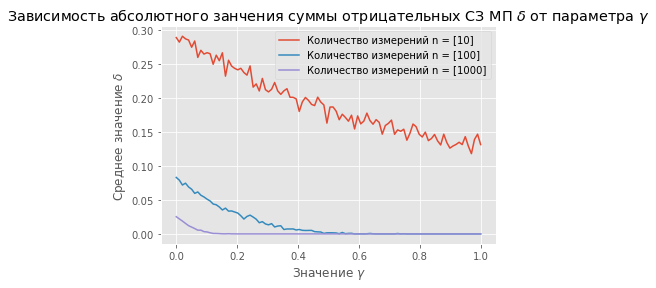

In [1054]:
plt.title(r'Зависимость абсолютного занчения суммы отрицательных СЗ МП $\delta$ от параметра $\gamma$')
for i in range(len(res)):
    plt.plot(res[1][i], res[2][i], label = r'Количество измерений n = {}'.format(res[0][i]))
    plt.xlabel(r'Значение $\gamma$')
    plt.ylabel(r'Среднее значение $\delta$')
plt.legend()
plt.show()

In [1051]:
d = 4
n = 100
gamma = 0
N = 1000

F_list = []
for i in range(N):
    rho = build_near_clear_rho(d = d, gamma = gamma)
    prob_res = estimate_probs(rho, n_shots = n, d = d)
    rho_new, delta = recover_rho(B, prob_res, correct_rho = True)
    F_list.append(Fidelity(rho_new,rho))

/home/stas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


No handles with labels found to put in legend.


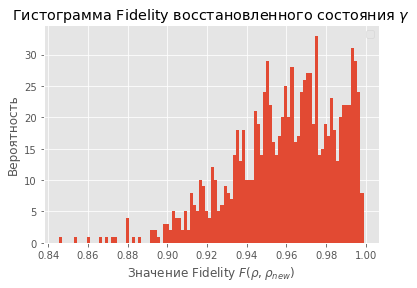

In [1056]:
plt.hist(F_list, bins = 100)
plt.title(r'Гистограмма Fidelity восстановленного состояния $\gamma$')
plt.xlabel(r'Значение Fidelity $F(\rho, \rho_{new})$')
plt.ylabel(r'Вероятность')
plt.legend()
plt.show()